In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv("train_after_selection.csv")
test = pd.read_csv("test_after_selection.csv")

In [3]:
train.head()

,Unnamed: 0.1,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction,Response
0,0,255531,1,46.0,1,0,0,152.0,0,0,0
1,1,27423,1,46.0,1,0,0,152.0,0,0,0
2,2,253915,1,46.0,1,1,1,26.0,2,2,0
3,3,167018,1,18.0,1,0,0,152.0,1,0,0
4,4,26965,1,11.0,0,1,1,122.0,2,2,0


In [4]:
test.head()

,Unnamed: 0.1,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
0,0,0,1,11.0,1,0,0,152.0,0,0
1,1,1,1,28.0,0,1,1,7.0,0,0
2,2,2,1,28.0,0,1,1,124.0,0,0
3,3,3,1,27.0,1,0,1,152.0,0,0
4,4,4,1,28.0,1,0,0,152.0,0,0


In [5]:
dropped = ['Unnamed: 0.1', 'Unnamed: 0']
train = train.drop(columns = dropped)
test = test.drop(columns = dropped)

In [6]:
train.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction,Response
0,1,46.0,1,0,0,152.0,0,0,0
1,1,46.0,1,0,0,152.0,0,0,0
2,1,46.0,1,1,1,26.0,2,2,0
3,1,18.0,1,0,0,152.0,1,0,0
4,1,11.0,0,1,1,122.0,2,2,0


In [7]:
test.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
0,1,11.0,1,0,0,152.0,0,0
1,1,28.0,0,1,1,7.0,0,0
2,1,28.0,0,1,1,124.0,0,0
3,1,27.0,1,0,1,152.0,0,0
4,1,28.0,1,0,0,152.0,0,0


### Separating features and target

In [8]:
y = train.pop("Response") #response
X = train #features

In [9]:
X.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
0,1,46.0,1,0,0,152.0,0,0
1,1,46.0,1,0,0,152.0,0,0
2,1,46.0,1,1,1,26.0,2,2
3,1,18.0,1,0,0,152.0,1,0
4,1,11.0,0,1,1,122.0,2,2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

### Standardizing features

Karena algoritma k nearest neighbors berbasis perhitungan jarak antar data point, maka wajib melakukan standardisasi features agar semua features diberikan treatment yang sama rata.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [12]:
#checking mean and standard distribution of the features after standardizing them

standard_df = pd.DataFrame(data = X_std, columns = ['Driving_License','Region_Code','Previously_Insured','Vehicle_Age',
                                                    'Vehicle_Damage','Policy_Sales_Channel','Age_Bin',
                                                    'Vehicle_Damage_Age_Interaction'])
standard_df.describe()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
count,9.031000e+04,9.031000e+04,9.031000e+04,9.031000e+04,9.031000e+04,9.031000e+04,9.031000e+04,9.031000e+04
mean,-3.991935e-16,1.200236e-16,-7.553106e-18,-1.192761e-16,1.117230e-16,1.278127e-16,5.192761e-17,1.346971e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.427471e+01,-2.086559e+00,-5.979592e-01,-1.329839e+00,-1.553782e+00,-1.844810e+00,-1.490855e+00,-1.125715e+00
25%,4.119514e-02,-8.318289e-01,-5.979592e-01,-1.329839e+00,-1.553782e+00,-1.396618e+00,-1.490855e+00,-1.125715e+00
50%,4.119514e-02,1.092183e-01,-5.979592e-01,4.457306e-01,6.435910e-01,3.602933e-01,-2.915363e-01,-1.638628e-02
75%,4.119514e-02,6.581626e-01,1.672355e+00,4.457306e-01,6.435910e-01,8.622681e-01,9.077824e-01,1.092943e+00
max,4.119514e-02,1.991313e+00,1.672355e+00,2.221300e+00,6.435910e-01,1.059472e+00,9.077824e-01,1.092943e+00


### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

In [26]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X_std, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [39]:
def eval_classification_func(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [42]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.73
Recall (Test Set): 0.87
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.84
roc_auc (crossval train): 0.5657856819528391
roc_auc (crossval test): 0.5516357975673574


### Hyperparamater tuning

In [41]:
n_neighbors = list(range(1,31))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn = KNeighborsClassifier()
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification_func(rs)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.73
Recall (Test Set): 0.94
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.85


### Best hyperparameter after tuning

In [44]:
show_best_hyperparameter(rs)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}


### Drawing and analyzing learning curve

number of neighbors: 1; train: 0.7652014949873314; test: 0.7446496618507843
number of neighbors: 2; train: 0.8216624499110778; test: 0.7974822145838628
number of neighbors: 3; train: 0.8326272809084156; test: 0.8121180999964723
number of neighbors: 4; train: 0.837885686662575; test: 0.814752505544557
number of neighbors: 5; train: 0.8423402808222695; test: 0.8220016236871116
number of neighbors: 6; train: 0.844281276750589; test: 0.8250831360145893
number of neighbors: 7; train: 0.8451134451341406; test: 0.8253813992912625
number of neighbors: 8; train: 0.8471056804561442; test: 0.8268967535416802
number of neighbors: 9; train: 0.8480028673768394; test: 0.8288348088717374
number of neighbors: 10; train: 0.8489400299828522; test: 0.831269254432663
number of neighbors: 11; train: 0.850714840521124; test: 0.8335445510446773
number of neighbors: 12; train: 0.8508275768428216; test: 0.8340805875102382
number of neighbors: 13; train: 0.8509388529477426; test: 0.8346598320571521
number of nei

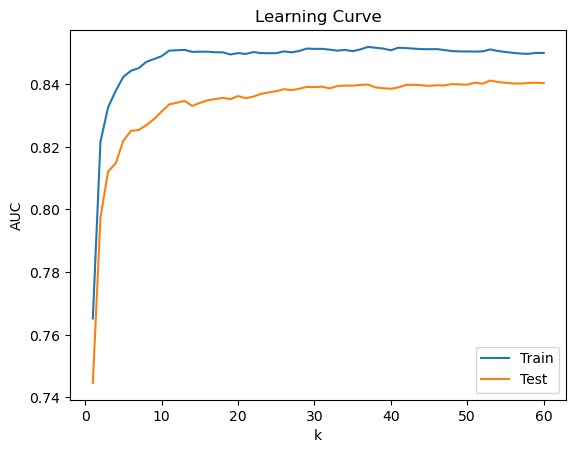

In [46]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train data
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test data
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('number of neighbors: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 60, 60)]
draw_learning_curve(param_values)